In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

In [1]:
# Remove question mark (missing values) in the raw file
# and save it in a new file 'arrhythmia.data'.
# This needs to be done only once, and all the following experiments can load 'arrhythmia.data' directly
with open('arrhythmia.data.orig') as inputfile:
    with open('arrhythmia.data', 'w') as outputfile:
        for line in inputfile:
            outputfile.write(line.replace('?', ''))

In [2]:
# read the data
df = pd.read_csv('arrhythmia.data', header=None)
y = df.iloc[:, -1]  # The last column is the ground-truth label vector
X = df.iloc[:, :-1]  # The first to second-last columns are the features

In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8
5,13,0,169,51,100,167,321,174,91,107,...,0.0,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1
6,40,1,160,52,77,129,377,133,77,77,...,-0.4,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5
7,49,1,162,54,78,0,376,157,70,67,...,-0.3,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8
8,44,0,168,56,84,118,354,160,63,61,...,0.1,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9
9,50,1,167,67,89,130,383,156,73,85,...,-0.5,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1


In [5]:
y

0       8
1       6
2      10
3       1
4       7
5      14
6       1
7       1
8       1
9      10
10      3
11      1
12     10
13      6
14      1
15      1
16     10
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25     16
26     14
27     10
28      2
29      2
       ..
422     1
423     1
424     9
425     1
426     1
427    10
428     1
429    16
430    10
431     6
432    10
433     3
434     1
435     1
436     1
437     1
438     1
439     1
440     1
441     1
442     1
443    10
444     1
445     1
446     1
447     1
448    10
449     2
450     1
451     1
Name: 279, dtype: int64

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

([<matplotlib.axis.XTick at 0x7f687458bf28>,
 <a list of 16 Text xticklabel objects>)

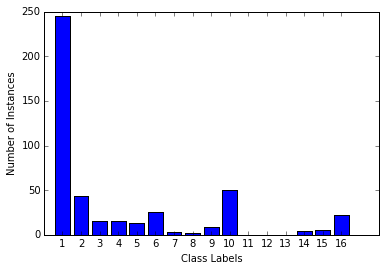

In [17]:
import matplotlib.pyplot as plt
# plot class distribution
x = np.arange(1,17)
h, bins = np.histogram(y, 16)
plt.bar(x-0.4, h)
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(x)
# We can see that the class distribution is unbalanced with the normal type being the major.
# Class 11, 12 and 13 are missing in the dataset.

In [4]:
# count the missing values in every column
# The missing values are encoded as NaN (float, np.nan).
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       8
11      22
12       1
13     376
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
      ... 
250      0
251      0
252      0
253      0
254      0
255      0
256      0
257      0
258      0
259      0
260      0
261      0
262      0
263      0
264      0
265      0
266      0
267      0
268      0
269      0
270      0
271      0
272      0
273      0
274      0
275      0
276      0
277      0
278      0
279      0
dtype: int64

In [5]:
# count the number of missing values
df.isnull().sum().sum()

408

In [3]:
# impute the missing data in the dataset
from sklearn.preprocessing import Imputer
# For the missing feature values, we impute it by using the feature's mean value,
# as this tend to improve performance (Jerez, 2010)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(X)
X

array([[  75. ,    0. ,  190. , ...,    2.9,   23.3,   49.4],
       [  56. ,    1. ,  165. , ...,    2.1,   20.4,   38.8],
       [  54. ,    0. ,  172. , ...,    3.4,   12.3,   49. ],
       ..., 
       [  36. ,    0. ,  166. , ...,    1. ,  -44.2,  -33.2],
       [  32. ,    1. ,  155. , ...,    2.4,   25. ,   46.6],
       [  78. ,    1. ,  160. , ...,    1.6,   21.3,   32.8]])

In [6]:
X.shape

(452, 279)

In [4]:
# normalizing the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.73443926, -1.1075202 ,  0.64132669, ...,  1.17773685,
         0.29460309,  1.07867028],
       [ 0.57931213,  0.90291807, -0.03199781, ...,  0.61612582,
         0.0796127 ,  0.50487408],
       [ 0.4577198 , -1.1075202 ,  0.15653305, ...,  1.52874375,
        -0.52087767,  1.0570176 ],
       ..., 
       [-0.63661117, -1.1075202 , -0.00506483, ..., -0.15608935,
        -4.7094834 , -3.3926096 ],
       [-0.87979583,  0.90291807, -0.30132761, ...,  0.82672996,
         0.42063193,  0.92710147],
       [ 1.91682776,  0.90291807, -0.16666271, ...,  0.26511892,
         0.14633386,  0.18008377]])

In [12]:
type(X)

numpy.ndarray

In [5]:
# splitting the dataset to training and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
X_train.shape

(316, 279)

In [15]:
X_test.shape

(136, 279)

In [16]:
y_train.shape

(316,)

In [17]:
y_test.shape

(136,)

In [18]:
type(X_train)

numpy.ndarray

# XGBoost

In [6]:
import xgboost
xgb = xgboost.XGBClassifier(objective="multi:softprob", nthread=-1)
xgb.fit(X_train, y_train)
y_train_xgb = xgb.predict(X_train)
y_pred_xgb = xgb.predict(X_test)
print('XGB Train Score:', np.mean(y_train == y_train_xgb))
print('XGB Test Score:', np.mean(y_test == y_pred_xgb))

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGB Train Score: 1.0
XGB Test Score: 0.75


In [20]:
print('XGB Train Score: {:.2f}'.format(xgb.score(X_train, y_train))) # R^2 score: mean accuracy
print('XGB Test Score: {:.2f}'.format(xgb.score(X_test, y_test)))

XGB Train Score: 1.00
XGB Test Score: 0.75


In [21]:
# 10-fold cross validation for XGB
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, y, cv=10)
print("XGB Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


XGB Accuracy: 0.74 (+/- 0.10)


In [22]:
scores

array([ 0.73076923,  0.75      ,  0.62      ,  0.75      ,  0.73913043,
        0.7804878 ,  0.82926829,  0.73170732,  0.7804878 ,  0.725     ])

# GradientBoostingClassifier

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
y_train_gbrt = gbrt.predict(X_train)
y_pred_gbrt = gbrt.predict(X_test)
print('GBRT Train Score: {:.2f}'.format(gbrt.score(X_train, y_train))) # R^2 score: mean accuracy
print('GBRT Test Score: {:.2f}'.format(gbrt.score(X_test, y_test)))

GBRT Train Score: 1.00
GBRT Test Score: 0.77


In [26]:
# 10-fold cross validation for GBRT
scores = cross_val_score(gbrt, X, y, cv=10)
print("GBRT Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBRT Accuracy: 0.73 (+/- 0.15)


In [28]:
scores

array([ 0.71153846,  0.73076923,  0.56      ,  0.70833333,  0.7173913 ,
        0.80487805,  0.82926829,  0.65853659,  0.75609756,  0.8       ])

# RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs=-1, random_state=0)
forest.fit(X_train, y_train)
y_train_forest = forest.predict(X_train)
y_pred_forest = forest.predict(X_test)
print('Random Forest Train Score: {:.2f}'.format(forest.score(X_train, y_train)))
print('Random Forest Test Score: {:.2f}'.format(forest.score(X_test, y_test)))

Random Forest Train Score: 0.98
Random Forest Test Score: 0.71


# LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.99
Logistic Regression Test Score: 0.71


# Regularization on LogisticRegression

In [32]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.8) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.99
Logistic Regression Test Score: 0.71


In [33]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.5) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.97
Logistic Regression Test Score: 0.73


In [34]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.1) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.92
Logistic Regression Test Score: 0.77


In [35]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.05) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.89
Logistic Regression Test Score: 0.79


In [36]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.01) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.83
Logistic Regression Test Score: 0.77


In [37]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.03) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.87
Logistic Regression Test Score: 0.77


In [13]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.08) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.90
Logistic Regression Test Score: 0.78


In [14]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.07) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.90
Logistic Regression Test Score: 0.78


In [10]:
# Tuning the regulation on Logistic Regression Model
# C controls the strength of regularization, smaller value, stronger regularization
lr = LogisticRegression(C=0.04) # C's default value is 1.0
lr.fit(X_train, y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)
print('Logistic Regression Train Score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Logistic Regression Test Score: {:.2f}'.format(lr.score(X_test, y_test)))

Logistic Regression Train Score: 0.88
Logistic Regression Test Score: 0.79


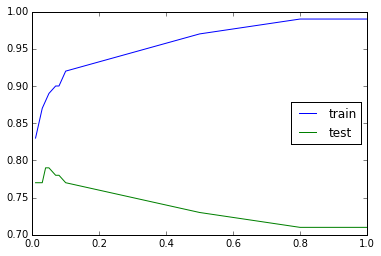

In [16]:
import matplotlib.pyplot as plt
C = [0.01, 0.03, 0.04, 0.05, 0.07, 0.08, 0.1, 0.5, 0.8, 1.0]
train = [0.83, 0.87, 0.88, 0.89, 0.9, 0.9, 0.92, 0.97, 0.99, 0.99]
test = [0.77, 0.77, 0.79, 0.79, 0.78, 0.78, 0.77, 0.73, 0.71, 0.71]
line1, = plt.plot(C, train, label="train")
line2, = plt.plot(C, test, label="test")
plt.legend(loc='right')

# Ensemble VotingClassifier

In [11]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('xgboost', xgb), ('gbrt', gbrt), ('forest', forest),
                                    ('logistic regression', lr)],
                        voting='soft',
                        weights=None) # weights's default value is None: uses uniform weights
eclf = eclf.fit(X_train, y_train)
y_train_ensemble = eclf.predict(X_train)
y_pred_ensemble = eclf.predict(X_test)
print('Ensemble Voting Train Score: {:.2f}'.format(eclf.score(X_train, y_train)))
print('Ensemble Voting Test Score: {:.2f}'.format(eclf.score(X_test, y_test)))

Ensemble Voting Train Score: 1.00
Ensemble Voting Test Score: 0.78


# 10-Fold Cross-validation

In [39]:
# 10-fold cross validation for Random Forest
scores = cross_val_score(forest, X, y, cv=10)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.72 (+/- 0.10)


In [40]:
# 10-fold cross validation for Logistic Regression
scores = cross_val_score(lr, X, y, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Logistic Regression Accuracy: 0.72 (+/- 0.13)


In [41]:
# 10-fold cross validation for Ensemble Voting
scores = cross_val_score(eclf, X, y, cv=10)
print("Ensemble Voting Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Ensemble Voting Accuracy: 0.75 (+/- 0.15)


# Grid Search and Hyperparameter Tuning

For XGBoost, we focus on 3 parameters:
1. reg_lambda (L2 regularization)
2. subsampling ratio to control the variance
3. reg_alpha (L1 regularization)

In [14]:
#Load the classifier
import xgboost as xgb
model = xgb.XGBClassifier(objective="multi:softprob", nthread=-1)

#Set up a new classifier that will do a grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    model,
    {
        'subsample': [0.8,0.9,1.0],
        'reg_lambda': [0.05,0.5,0.7],
        'reg_alpha': [0.6,0.7,0.8],
    },
    verbose=2,
    n_jobs=-1,
)
print("Done")
#Fit the classifier to the training data, which will randomly search for hyperparameters
clf.fit(X_train, y_train)

print("DONE")

Done
Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[CV] subsample=0.8, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] subsample=0.8, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.8, reg_alpha=0.6, reg_lambda=0.05, total=  24.1s
[CV] subsample=0.8, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.8, reg_alpha=0.6, reg_lambda=0.05, total=  25.9s
[CV] subsample=0.9, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.9, reg_alpha=0.6, reg_lambda=0.05, total=  32.4s
[CV] subsample=0.9, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.8, reg_alpha=0.6, reg_lambda=0.05, total=  34.3s
[CV] subsample=0.9, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.9, reg_alpha=0.6, reg_lambda=0.05, total=  44.0s
[CV] subsample=1.0, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .... subsample=0.9, reg_alpha=0.6, reg_lambda=0.05, total=  45.8s
[CV] subsample=1.0, reg_alpha=0.6, reg_lambda=0.05 ...................
[CV] .

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.5min


[CV] ..... subsample=0.8, reg_alpha=0.7, reg_lambda=0.5, total=  39.4s
[CV] subsample=0.9, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=0.8, reg_alpha=0.7, reg_lambda=0.5, total=  35.6s
[CV] subsample=0.9, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=0.9, reg_alpha=0.7, reg_lambda=0.5, total=  33.8s
[CV] subsample=0.9, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=0.9, reg_alpha=0.7, reg_lambda=0.5, total=  22.4s
[CV] subsample=1.0, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=0.9, reg_alpha=0.7, reg_lambda=0.5, total=  24.5s
[CV] subsample=1.0, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=1.0, reg_alpha=0.7, reg_lambda=0.5, total=  16.6s
[CV] subsample=1.0, reg_alpha=0.7, reg_lambda=0.5 ....................
[CV] ..... subsample=1.0, reg_alpha=0.7, reg_lambda=0.5, total=  18.3s
[CV] subsample=0.8, reg_alpha=0.7, reg_lambda=0.7 ....................
[CV] .

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 20.5min finished


DONE


In [15]:
print('XGB Train Score: {:.2f}'.format(clf.score(X_train, y_train)))
print('XGB Test Score: {:.2f}'.format(clf.score(X_test, y_test)))

XGB Train Score: 1.00
XGB Test Score: 0.77


In [16]:
clf.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0.7, reg_lambda=0.05,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.9)

In [17]:
clf.best_params_

{'reg_alpha': 0.7, 'reg_lambda': 0.05, 'subsample': 0.9}

In [6]:
#Load the classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Set up a new classifier that will do a grid search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(
    model,
    {
        'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    },
    verbose=2,
    n_jobs=-1
)
print("Done")
#Fit the classifier to the training data, which will randomly search for hyperparameters
clf.fit(X_train, y_train)

print("DONE")

Done
Fitting 3 folds for each of 19 candidates, totalling 57 fits


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[CV] C=0.01 ..........................................................
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.1s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.2s
[CV] C=0.02 ..........................................................
[CV] ........................................... C=0.01, total=   0.2s
[CV] ........................................... C=0.02, total=   0.1s
[CV] C=0.02 ..........................................................
[CV] C=0.03 ..........................................................
[CV] ........................................... C=0.03, total=   0.1s
[CV] C=0.03 ..........................................................
[CV] ........................................... C=0.02, total=   0.3s
[CV] C=0.02 ..........................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  54 out of  57 | elapsed:    9.1s remaining:    0.5s


[CV] ............................................ C=1.0, total=   0.4s
[CV] ............................................ C=1.0, total=   0.3s


[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    9.4s finished


DONE


In [7]:
print('LogisticRegression Train Score: {:.2f}'.format(clf.score(X_train, y_train)))
print('LogisticRegression Test Score: {:.2f}'.format(clf.score(X_test, y_test)))

LogisticRegression Train Score: 0.87
LogisticRegression Test Score: 0.77


In [8]:
clf.best_params_

{'C': 0.03}

In [9]:
clf.grid_scores_

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.65190, std: 0.04685, params: {'C': 0.01},
 mean: 0.67089, std: 0.03144, params: {'C': 0.02},
 mean: 0.67405, std: 0.02770, params: {'C': 0.03},
 mean: 0.66772, std: 0.02779, params: {'C': 0.04},
 mean: 0.66456, std: 0.03185, params: {'C': 0.05},
 mean: 0.65823, std: 0.02791, params: {'C': 0.06},
 mean: 0.66139, std: 0.02856, params: {'C': 0.07},
 mean: 0.65823, std: 0.03547, params: {'C': 0.08},
 mean: 0.65190, std: 0.03607, params: {'C': 0.09},
 mean: 0.64873, std: 0.03559, params: {'C': 0.1},
 mean: 0.63924, std: 0.02816, params: {'C': 0.2},
 mean: 0.63291, std: 0.02450, params: {'C': 0.3},
 mean: 0.62975, std: 0.02073, params: {'C': 0.4},
 mean: 0.62342, std: 0.01715, params: {'C': 0.5},
 mean: 0.62025, std: 0.01330, params: {'C': 0.6},
 mean: 0.62025, std: 0.01330, params: {'C': 0.7},
 mean: 0.61392, std: 0.01633, params: {'C': 0.8},
 mean: 0.61076, std: 0.01862, params: {'C': 0.9},
 mean: 0.60759, std: 0.01438, params: {'C': 1.0}]

In [10]:
clf.cv_results_

{'mean_fit_time': array([ 0.1628472 ,  0.24622067,  0.15866995,  0.28946972,  0.23289839,
         0.26916718,  0.27529677,  0.26934648,  0.27132312,  0.2537516 ,
         0.32405893,  0.280068  ,  0.33458773,  0.37996538,  0.36021797,
         0.37131357,  0.3777221 ,  0.31535602,  0.35831642]),
 'mean_score_time': array([ 0.00762653,  0.00594918,  0.00761588,  0.00099063,  0.00712856,
         0.00401092,  0.01214623,  0.00261482,  0.0123566 ,  0.00479945,
         0.00912865,  0.00307663,  0.01119677,  0.0092291 ,  0.0116992 ,
         0.00589252,  0.00747681,  0.00178401,  0.00498954]),
 'mean_test_score': array([ 0.65189873,  0.67088608,  0.67405063,  0.66772152,  0.66455696,
         0.65822785,  0.66139241,  0.65822785,  0.65189873,  0.64873418,
         0.63924051,  0.63291139,  0.62974684,  0.62341772,  0.62025316,
         0.62025316,  0.61392405,  0.61075949,  0.60759494]),
 'mean_train_score': array([ 0.85584793,  0.88116513,  0.89376209,  0.90340919,  0.90967021,
         

# Learning Curves for Logistic Regression

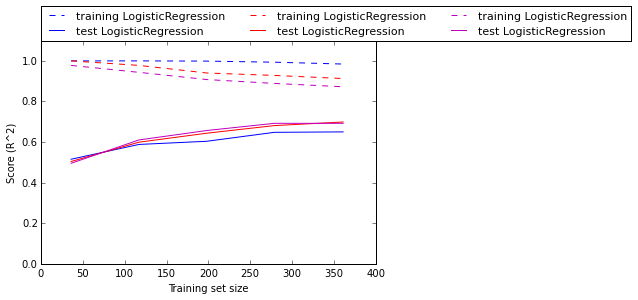

In [4]:
from common_load import load_data
from sklearn.linear_model import LogisticRegression
from plot_learning_curve import plot_learning_curve
import matplotlib.pyplot as plt


X, y = load_data()

lr_a = LogisticRegression() # C=1.0
lr_b = LogisticRegression(C=0.1)
lr_c = LogisticRegression(C=0.03)
plot_learning_curve(lr_a, X, y)
plot_learning_curve(lr_b, X, y)
plot_learning_curve(lr_c, X, y)
plt.legend(loc=(0, 1.00), ncol=3, fontsize=11)

In [11]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          1       0.81      0.90      0.86        73
          2       0.64      0.64      0.64        11
          3       0.67      1.00      0.80         8
          4       0.33      1.00      0.50         1
          5       0.00      0.00      0.00         6
          6       0.60      0.43      0.50         7
          7       0.00      0.00      0.00         1
          9       1.00      1.00      1.00         4
         10       1.00      0.88      0.93        16
         14       1.00      0.50      0.67         2
         16       0.25      0.14      0.18         7

avg / total       0.74      0.77      0.75       136



/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Ensemble VotingClassifier built upon tuned classifiers

In [24]:
from sklearn.ensemble import VotingClassifier
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

xgb = xgboost.XGBClassifier(objective="multi:softprob", nthread=-1, subsample=0.9, reg_lambda=0.05, reg_alpha=0.7)
gbrt = GradientBoostingClassifier(random_state=0)
forest = RandomForestClassifier(n_jobs=-1, random_state=0)
lr = LogisticRegression(C=0.03)

eclf = VotingClassifier(estimators=[('xgboost', xgb), ('gbrt', gbrt), ('forest', forest),
                                    ('logistic regression', lr)],
                        voting='soft',
                        weights=None) # weights's default value is None: uses uniform weights
eclf = eclf.fit(X_train, y_train)
y_train_ensemble = eclf.predict(X_train)
y_pred_ensemble = eclf.predict(X_test)
print('Ensemble Voting Train Score: {:.2f}'.format(eclf.score(X_train, y_train)))
print('Ensemble Voting Test Score: {:.2f}'.format(eclf.score(X_test, y_test)))

Ensemble Voting Train Score: 1.00
Ensemble Voting Test Score: 0.78


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, cv=10)
print("XGBoost Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(gbrt, X, y, cv=10)
print("GBRT Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(lr, X, y, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(forest, X, y, cv=10)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(eclf, X, y, cv=10)
print("Ensemble Voting Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


XGBoost Accuracy: 0.75 (+/- 0.11)


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBRT Accuracy: 0.73 (+/- 0.15)


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Logistic Regression Accuracy: 0.72 (+/- 0.13)


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.72 (+/- 0.10)


/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Ensemble Voting Accuracy: 0.76 (+/- 0.13)


# Confusion Matrix

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


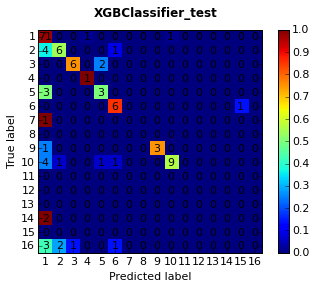

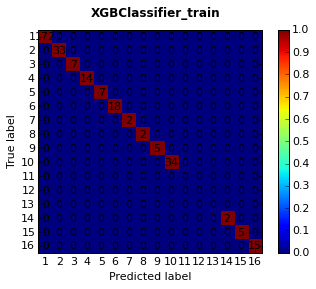

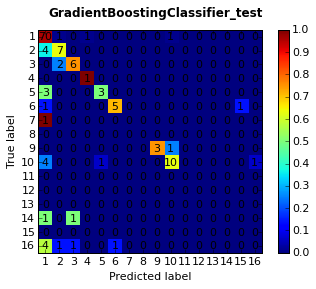

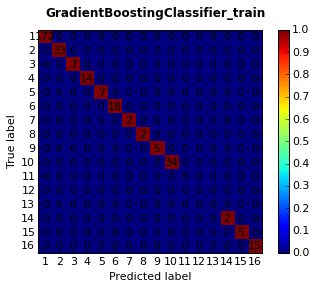

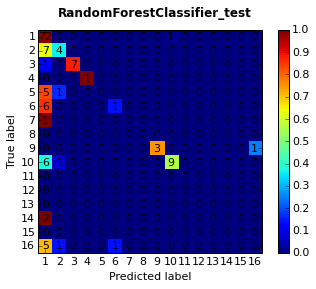

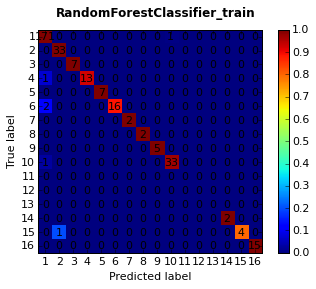

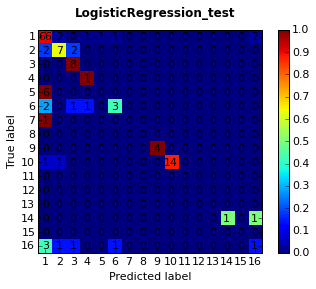

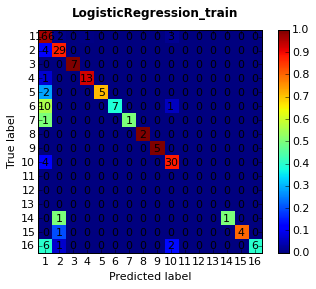

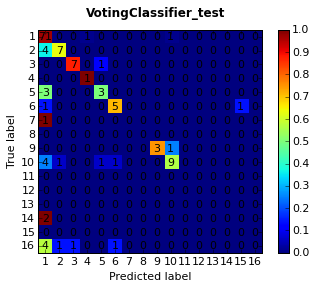

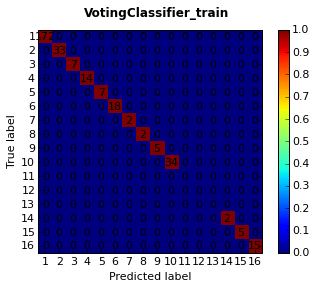

In [1]:
%matplotlib inline
from common_load import load_data
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import gen_confusion_matrix_figure


X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xgb = xgboost.XGBClassifier(objective="multi:softprob", nthread=-1,
                            reg_alpha=0.7, reg_lambda=0.05, subsample=0.9)
gbrt = GradientBoostingClassifier(random_state=0)
forest = RandomForestClassifier(n_jobs=-1, random_state=0)
lr = LogisticRegression(C=0.03)
eclf = VotingClassifier(estimators=[('xgboost', xgb), ('gbrt', gbrt), ('forest', forest),
                                    ('logistic regression', lr)],
                        voting='soft',
                        weights=None)

classifier_list = [xgb, gbrt, forest, lr, eclf]

for clf in classifier_list:
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    y_train_pred = clf.fit(X_train, y_train).predict(X_train)

    # Compute confusion matrix
    cnf_test = confusion_matrix(y_test, y_pred, labels=range(1, 17))
    cnf_train = confusion_matrix(y_train, y_train_pred, labels=range(1, 17))

    # Plot confusion matrix
    gen_confusion_matrix_figure(cnf_test, clf.__class__.__name__ + "_test")
    gen_confusion_matrix_figure(cnf_train, clf.__class__.__name__ + "_train")

# Classification Report

In [3]:
from sklearn.metrics import classification_report

for clf in classifier_list:
    clf.fit(X_train, y_train)
    y_true, y_pred = y_test, clf.predict(X_test)
    print(clf.__class__.__name__)
    print(classification_report(y_true, y_pred))

XGBClassifier
             precision    recall  f1-score   support

          1       0.80      0.97      0.88        73
          2       0.67      0.55      0.60        11
          3       0.86      0.75      0.80         8
          4       0.50      1.00      0.67         1
          5       0.50      0.50      0.50         6
          6       0.67      0.86      0.75         7
          7       0.00      0.00      0.00         1
          9       1.00      0.75      0.86         4
         10       0.90      0.56      0.69        16
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         7

avg / total       0.73      0.77      0.74       136

GradientBoostingClassifier
             precision    recall  f1-score   support

          1       0.80      0.96      0.87        73
          2       0.64      0.64      0.64        11
          3       0.75      0.75      0.75         8
 

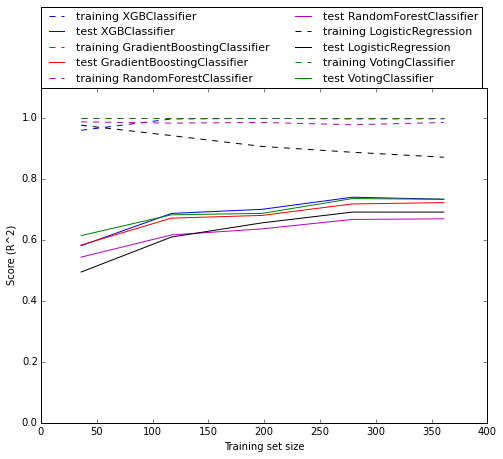

In [7]:
%matplotlib inline
from common_load import load_data
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from plot_learning_curve import plot_learning_curve
import matplotlib.pyplot as plt


X, y = load_data()

xgb = xgboost.XGBClassifier(objective="multi:softprob", nthread=-1,
                            reg_alpha=0.7, reg_lambda=0.05, subsample=0.9)
gbrt = GradientBoostingClassifier(random_state=0)
forest = RandomForestClassifier(n_jobs=-1, random_state=0)
lr = LogisticRegression(C=0.03)
eclf = VotingClassifier(estimators=[('xgboost', xgb), ('gbrt', gbrt), ('forest', forest),
                                    ('logistic regression', lr)],
                        voting='soft',
                        weights=None)

classifier_list = [xgb, gbrt, forest, lr, eclf]

plt.figure(figsize=(8,6))
for clf in classifier_list:
    plot_learning_curve(clf, X, y)
    plt.legend(loc=(0, 1.00), ncol=2, fontsize=11)